<a href="https://colab.research.google.com/github/KARTIKPARATKAR/DEEP-LEARNING-WORK/blob/main/RNN_Sentiment_Analysis_with_Keras_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sentiment Analysis-**

sentiment analysis uses NLP to analyze text and determine the emotional tone (positive, negative, or neutral) expressed within it. The dataset we will be having for sentiment analysis will be like we will have text in english l;anduage and its sentiment as 1 for positive sentiment and 0 for negative sentiment.Most important thing to do here is to convert this text data into numbers or into vectores because RNN models will work only on numbers or vectores. We have two techniques 1)Integer Encoding and 2) Embeddings.

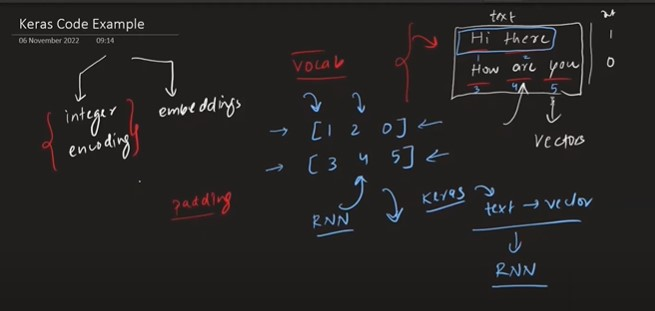

1)Integer Encoding-

To convert text data into vectors , Integer Encoding is used. For this we will form a vocabolary means in whole dataset how many unique words are there.We will provide the integer value to each unique word which means we are providing a index to each unique word.We replace the sentence with the assigned index values.We will apply padding means we will write 0 if there is any shorter number of word sentence found to make all the sentences of same size so as to give input to the neural network.So now we have a vector representation of the each sentence and we can give these vectors to the RNN network as input data.

**We will convert text into vectors using Integer Encoding and we will pass these vectors through RNN to train**

In [20]:
import numpy as np

In [21]:
docs = ['go india',  #This is our input data
		'india india',   #There are 10 sentences in our dataset
		'hip hip hurray', #Every item is one sentence
		'jeetega bhai jeetega india jeetega',
		'bharat mata ki jai',
		'kohli kohli',
		'sachin sachin',
		'dhoni dhoni',
		'modi ji ki jai',
		'inquilab zindabad']

In [22]:
#We will tokenize the dataset
#tokenize means differnetiating each word from sentence
#if there is capital letter then convert it into small letters

from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token = 'nitish')
#oov means out of vocabulary token which means if any new word is coming which
#was not there in training the RNN , so we will replace that word with Nitish

In [23]:
tokenizer.fit_on_texts(docs)

In [24]:
tokenizer.word_index
#This will tell how many unique words are there and which index value is assigned to each word

{'nitish': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'kohli': 7,
 'sachin': 8,
 'dhoni': 9,
 'go': 10,
 'hurray': 11,
 'bhai': 12,
 'bharat': 13,
 'mata': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [25]:
tokenizer.word_counts
#This gives how many times each word is occuring

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 2),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [26]:
tokenizer.document_count
#This will give how many sentences are there in the document

10

In [27]:
#Sequences will be generated with following code.
#Our 1st sentence is go india . Index for go is 10 and index for india is 2 so we got sequence as [10 ,2]
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[10, 2],
 [2, 2],
 [4, 4, 11],
 [3, 12, 3, 2, 3],
 [13, 14, 5, 6],
 [7, 7],
 [8, 8],
 [9, 9],
 [15, 16, 5, 6],
 [17, 18]]

In [28]:
#We will have to apply padding as size of each sentence is not same
#There are 2 words in some sentence , 3 words in some sentence and  5 words in some sentence
#So we will apply padding means write 0 to make all the sentence of same size
from keras.utils import pad_sequences

In [29]:
sequences = pad_sequences(sequences,padding = 'post') #Here post means 0 will be added after the actual values of index

In [30]:
sequences
#Observe all the sentences are of same size with post padding

array([[10,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 11,  0,  0],
       [ 3, 12,  3,  2,  3],
       [13, 14,  5,  6,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [ 9,  9,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

So this is how our input data is ready.

**Now we will try Sentiment Analysis code in keras**

We will use inbuild dataset of imdb wherein imdb reviews and sentiments are given.

In [31]:
from tensorflow.keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense , SimpleRNN , Embedding ,Flatten

In [32]:
#Loading the dataset
(x_train,y_train),(x_test,y_test) = imdb.load_data()

In [33]:
x_train
#THe data is already integer encoded and tokenized which means
#pre-processing of the data is already done

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [34]:
x_test.shape

(25000,)

In [35]:
x_train.shape

(25000,)

In [36]:
x_train[0]
#This will give first review.
#We are getting reviews in integer because we have already given unique
#integer to each word in a review by integer encoding process because RNN
# understands integers and vectors and not the english words.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [37]:
len(x_train[0])

218

In [38]:
len(x_train[1])

189

In [39]:
#So above two cells suggest that we have length of each review is different
#We have to make lenght of each review same by using padding process
from keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train,padding='post',maxlen=50)
x_test = pad_sequences(x_test,padding='post',maxlen=50)
#Here we are taking only 50 words of review becuase we want less amount of data
#to train the model resulting in faster training

In [40]:
x_train.shape
#Observe we have 25000 review are has 50 words in each reviw

(25000, 50)

In [41]:
x_train[0]

array([2071,   56,   26,  141,    6,  194, 7486,   18,    4,  226,   22,
         21,  134,  476,   26,  480,    5,  144,   30, 5535,   18,   51,
         36,   28,  224,   92,   25,  104,    4,  226,   65,   16,   38,
       1334,   88,   12,   16,  283,    5,   16, 4472,  113,  103,   32,
         15,   16, 5345,   19,  178,   32], dtype=int32)

Now we will build RNN model

In [44]:
model = Sequential()
#Return_sequence is false means only last output of the sequence is returned
#If we keep it true, then for all the time-steps output will be returned
model.add(SimpleRNN(32,input_shape=(50,1),return_sequences=False)) #SimpleRNN layer with 32 nodes
model.add(Dense(1,activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Here we got 1121 trainable parameters.We have input size of shape 50 so this 50 will word as a 50 different time stamps.INput is connected to 32 nodes so these 32 weights.32 * 32 weights of recurrent connection to each other nodes of RNN hidden layer. 32 weights of hidden layer connecting to output layer. We will have 32 bias of hidden nodes and 1 bias of output layer . So in total we will have --

32 + 32 +32*32 = 1088 weights


In [45]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5140 - loss: 0.6918 - val_accuracy: 0.5046 - val_loss: 0.6939
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5089 - loss: 0.6926 - val_accuracy: 0.5047 - val_loss: 0.6932
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5106 - loss: 0.6919 - val_accuracy: 0.5025 - val_loss: 0.6936
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5133 - loss: 0.6921 - val_accuracy: 0.5055 - val_loss: 0.6934
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.5062 - loss: 0.6923 - val_accuracy: 0.5048 - val_loss: 0.6943


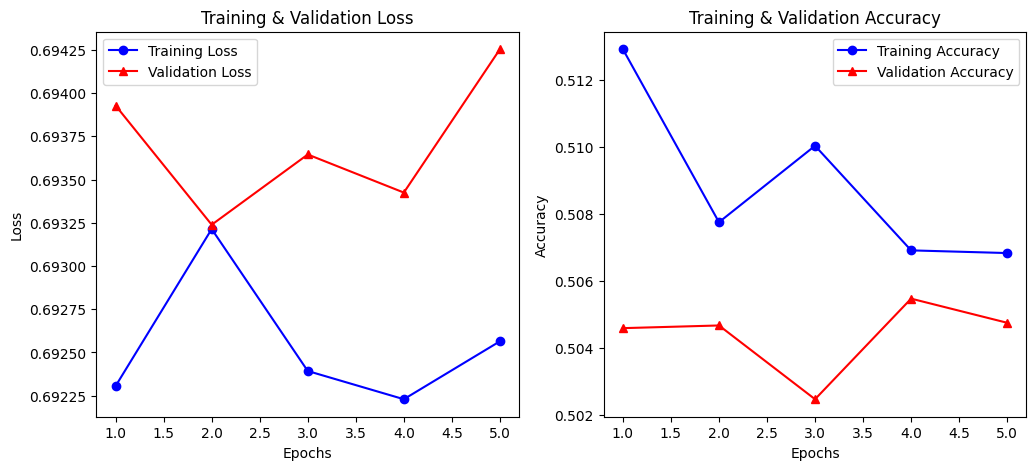

In [48]:
import matplotlib.pyplot as plt

# Extract history data
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

# Plot Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')  # 'bo-' means blue circles & line
plt.plot(epochs, val_loss, 'r^-', label='Validation Loss')  # 'r^-' means red triangles & line
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

# Plot Accuracy (if available)
if 'accuracy' in history_dict:
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r^-', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training & Validation Accuracy')
    plt.legend()

plt.show()
